In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## Let's get the dataset

In [0]:
from keras.datasets import fashion_mnist

In [0]:
(x_tr_src, y_tr_src),(x_te_src,y_te_src) = fashion_mnist.load_data()

In [0]:
# How many samples have we got?

In [4]:
x_tr_src.shape # 60K samples of 28x28!

(60000, 28, 28)

In [5]:
y_tr_src.shape #60K labels...a label per sample

(60000,)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

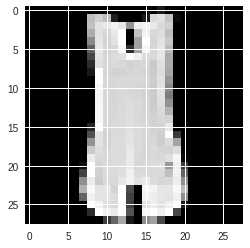

In [7]:
plt.imshow(x_tr_src[4], cmap='gray') #the first sample is a 5

In [8]:
y_tr_src[4] #then, the first label should be a 5

0

In [9]:
set(y_tr_src) #we have 10 different classes! 
#y_tr_src[0]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Data preprocessing

### Data normalization - values from 0 to 1

In [0]:
x_tr_src = x_tr_src.astype('float32')/255.
x_te_src = x_te_src.astype('float32')/255.

### Data vectorization - a vector of 28*28 elements per image, just to fit our NN input

In [0]:
x_tr = x_tr_src.reshape(x_tr_src.shape[0], (28*28))
x_te = x_te_src.reshape(x_te_src.shape[0], (28*28))

In [12]:
x_tr.shape

(60000, 784)

### Labels to categorical - one hot encoded vector

In [0]:
from keras.utils import to_categorical

In [0]:
y_tr = to_categorical(y_tr_src)
y_te = to_categorical(y_te_src)

In [15]:
y_tr.shape

(60000, 10)

## Plot utils

In [0]:
def print_acc(hist):
    epochs = range(1, len(hist['acc'])+1)
    plt.plot(epochs, hist['acc'], 'b', label='Training acc')
    plt.plot(epochs, hist['val_acc'], 'r', label='Validation acc')
    plt.title('Training and validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [0]:
def print_loss(hist):
    epochs = range(1, len(hist['loss'])+1)
    plt.plot(epochs, hist['loss'], 'b', label='Training loss')
    plt.plot(epochs, hist['val_loss'], 'r', label='Validation loss')
    plt.title('Training and validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [0]:
from keras import models, layers #packages

# Densely-connected network approach

### 1- Let's create the model

In [0]:
#A function to create the model
def build_dense_model():
    model = models.Sequential()
    
    model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
dense_model = build_dense_model() #Create the model

In [0]:
dense_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
dense_hist = dense_model.fit(x_tr, y_tr, epochs=5, batch_size=128, validation_data=(x_te,y_te)) #train the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5733 - acc: 0.7995 - val_loss: 0.4901 - val_acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.4083 - acc: 0.8520 - val_loss: 0.4119 - val_acc: 0.8504
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3609 - acc: 0.8688 - val_loss: 0.3744 - val_acc: 0.8675
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3328 - acc: 0.8790 - val_loss: 0.3699 - val_acc: 0.8686
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3127 - acc: 0.8863 - val_loss: 0.3535 - val_acc: 0.8754


In [0]:
dense_hist = dense_hist.history

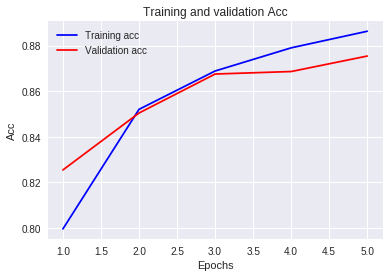

In [0]:
print_acc(dense_hist)

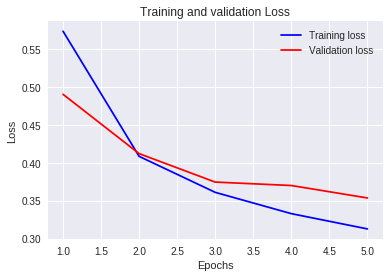

In [0]:
print_loss(dense_hist)

# Convolutional Neural Network approach

The code below show you what a basic convnet looks like. It's a stack of Conv2D and MaxPooling2D layers. 

Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). 

In our case, we will configure our convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We do this via passing the argument input_shape=(28, 28, 1) to our first layer.

In [0]:
#A function to create the model
def build_cnn_model():
    model = models.Sequential()
    
    model = models.Sequential()
    # number of K
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Note the input dim is 28x28x1!!
    model.add(layers.MaxPooling2D(2, 2))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
x_tr = x_tr_src.reshape((x_tr_src.shape[0], 28, 28, 1))
x_te = x_te_src.reshape((x_te_src.shape[0], 28, 28, 1))

In [0]:
cnn_model = build_cnn_model()

In [0]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                36928     
__________

You can see above that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to the Conv2D layers (e.g. 32 or 64).

Then, we feed our last output tensor (of shape (3, 3, 64)) into a densely-connected classifier network like those you are already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. So first, we will have to flatten our 3D outputs to 1D, and then add a few Dense layers on top. As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576,), before going through two Dense layers.

In [0]:
cnn_hist = cnn_model.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te)) #train the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.5447 - acc: 0.7984 - val_loss: 0.4014 - val_acc: 0.8538
Epoch 2/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.3378 - acc: 0.8764 - val_loss: 0.3708 - val_acc: 0.8660
Epoch 3/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.2870 - acc: 0.8959 - val_loss: 0.3033 - val_acc: 0.8903
Epoch 4/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.2566 - acc: 0.9070 - val_loss: 0.2919 - val_acc: 0.8988
Epoch 5/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.2336 - acc: 0.9135 - val_loss: 0.2775 - val_acc: 0.9045


In [0]:
cnn_hist = cnn_hist.history

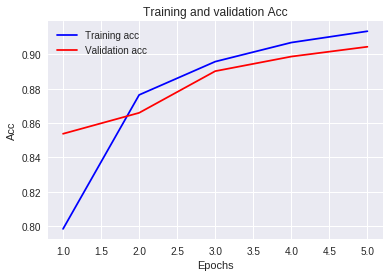

In [0]:
print_acc(cnn_hist)

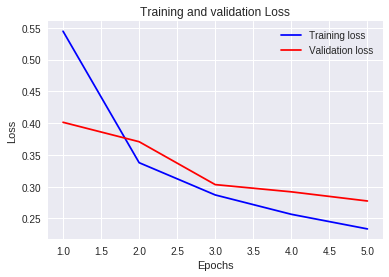

In [0]:
print_loss(cnn_hist)

While our densely-connected network from the first example had a test accuracy of 97.7%, our basic convnet has a test accuracy of 99.1%: we decreased our error rate by 61% (relative).

# Homework

In [0]:
import time
import numpy as np

start = time.time()

for i in range(100000):
    a = np.zeros([5,5])
    
end = time.time()
print("Time: %.3f seconds" % (end - start))

Time: 0.069 seconds


In [0]:
# 1- Modify def print_acc(hist) and create a function to plot time (y axis) and number of convolutional layers (x axis)
# 2- Plot the time (calling the previous defined function) for 1, 2, 3 and 4 convolutional layers:
#    epochs=5, batch_size=64
# 3- Also plot the final accuracy and the final Loss

In [0]:
def print_timesss(hist):
    #epochs = range(1, len(hist['acc'])+1)
    #time = end - start
    plt.plot(epochs, hist['acc'], 'b', label='Convolution Layers')
    plt.plot(epochs, time, 'r', label='Time')
    plt.title('Training and validation Acc')
    plt.xlabel('Number of Convolution Layers')
    plt.ylabel('Time')
   # t = vector(start,end)
    #conv = vector(1,2,3,4)
    plt.legend()
    plt.show()

In [0]:
def build_cnn_model_1():
    model = models.Sequential()
    
    model = models.Sequential()
    # number of K
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Note the input dim is 28x28x1!!
    model.add(layers.MaxPooling2D((2, 2)))
 
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
def build_cnn_model_2():
    model = models.Sequential()
    
    model = models.Sequential()
    # number of K
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Note the input dim is 28x28x1!!
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
def build_cnn_model_3():
    model = models.Sequential()
    
    model = models.Sequential()
    # number of K
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Note the input dim is 28x28x1!!
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
def build_cnn_model_4():
    model = models.Sequential()
    
    model = models.Sequential()
    # number of K
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Note the input dim is 28x28x1!!
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
cnn_1 = build_cnn_model_1()
cnn_2 = build_cnn_model_2()
cnn_3 = build_cnn_model_3()
#cnn_4 = build_cnn_model_4()

cnn_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                346176    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
cnn_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
cnn_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                36928     
__________

In [0]:
start_1 = time.time()
cnn_hist_1 = cnn_1.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te)) #train the model
end_1 = time.time()
time_1 = end_1-start_1
print(time_1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.4566 - acc: 0.8371 - val_loss: 0.3616 - val_acc: 0.8718
Epoch 2/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.2972 - acc: 0.8941 - val_loss: 0.3012 - val_acc: 0.8908
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.2520 - acc: 0.9094 - val_loss: 0.2718 - val_acc: 0.9015
Epoch 4/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.2219 - acc: 0.9200 - val_loss: 0.2711 - val_acc: 0.9050
Epoch 5/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.2004 - acc: 0.9275 - val_loss: 0.2624 - val_acc: 0.9086
36.2827210426


In [0]:
cnn_hist_1 = cnn_hist_1.history

In [0]:
import time
import numpy as np

start_1 = time.time()

for i in range(100000):
    a = np.zeros([5,5])
    
end_1 = time.time()
t_1 = end_1 - start_1
#print("Time: %.3f seconds" % (t_1))


In [0]:
start_2 = time.time()
cnn_hist_2 = cnn_2.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te)) #train the model
end_2 = time.time()
time_2 = end_2 - start_2
print(time_2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.4454 - acc: 0.8412 - val_loss: 0.3283 - val_acc: 0.8799
Epoch 2/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.2750 - acc: 0.8996 - val_loss: 0.2595 - val_acc: 0.9071
Epoch 3/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.2271 - acc: 0.9182 - val_loss: 0.2681 - val_acc: 0.9053
Epoch 4/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.1946 - acc: 0.9292 - val_loss: 0.2501 - val_acc: 0.9091
Epoch 5/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.1731 - acc: 0.9372 - val_loss: 0.2531 - val_acc: 0.9096
47.3896641731


In [0]:
cnn_hist_2 = cnn_hist_2.history

In [0]:
import time
import numpy as np

start_2 = time.time()

for i in range(100000):
    a = np.zeros([5,5])
    
end_2 = time.time()
t_2 = end_2 - start_2
#print("Time: %.3f seconds" % (end - start))

In [0]:
start_3 = time.time()
cnn_hist_3 = cnn_3.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te)) #train the model
end_3 = time.time()
time_3 = end_3 - start_3
print(time_3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.5327 - acc: 0.8034 - val_loss: 0.3932 - val_acc: 0.8577
Epoch 2/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.3303 - acc: 0.8791 - val_loss: 0.3323 - val_acc: 0.8821
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.2793 - acc: 0.8974 - val_loss: 0.2967 - val_acc: 0.8939
Epoch 4/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.2501 - acc: 0.9087 - val_loss: 0.2940 - val_acc: 0.8910
Epoch 5/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.2263 - acc: 0.9157 - val_loss: 0.2802 - val_acc: 0.8997
53.5359508991


In [0]:
cnn_hist_3 = cnn_hist_3.history

In [0]:
import time
import numpy as np

start_3 = time.time()

for i in range(100000):
    a = np.zeros([5,5])
    
end_3 = time.time()
t_3 = end_3 - start_3
#print("Time: %.3f seconds" % (t_3))

In [0]:
times = [time_1, time_2, time_3]
histories = [cnn_hist_1['val_acc'][4]*100, cnn_hist_2['val_acc'][4]*100, cnn_hist_3['val_acc'][4]*100]
loss = [cnn_hist_1['loss'][4]*100, cnn_hist_2['loss'][4]*100, cnn_hist_3['loss'][4]*100]

print(cnn_hist_1['acc'])


[0.83705, 0.8940666666666667, 0.9094166666666667, 0.9199833333333334, 0.9274833333333333]


In [0]:
def print_time(times, histories, loss):
    epochs = range(1,4)
    #time = end - start
    plt.plot(epochs, times, 'b', label='Time')
    plt.plot(epochs, histories, 'r', label='Accuracy')
    plt.plot(epochs,loss, 'g', label='Loss')
    plt.title('Time & Convolution Layers')
    plt.xlabel('Number of Convolution Layers accuracy')
    plt.ylabel('Time')
    plt.legend()
    plt.show()

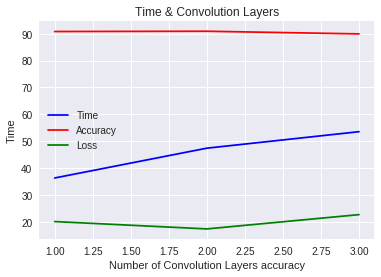

In [0]:
print_time(times, histories, loss)